# 목표 및 가설 세우기

**목표 - 학습 서비스를 이용하는 독자들 중 누가 서비스 구독을 연장할지 예측**

**가설 - 꾸준히 학습하고, 성취도가 높은 사용자들이 구독을 연장할 것이다.**

monthly_active_learning_days: 월간 활동적인 학습 일수  
recent_learning_achievement: 최근 학습 성취도

위 데이터를 통해 학습을 꾸준히 하는 사용자인지 파악하고, "target" 데이터를 통해 다음달에 구독을 계속하는 지 여부를 확인

## 데이터 로드

In [2]:
import pandas as pd

In [3]:
df = pd.read_table('data/mini.csv',sep=',')
df

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ae6b76bc,22,29,14.727623,84.053558,18,16,64.966803,2,5,Low,Premium,1,1,1
9996,24588752,10,11,19.374054,45.464833,9,8,82.750244,3,3,Medium,Basic,2,7,1
9997,e4622a54,7,27,18.240978,127.302411,24,14,81.567839,3,5,High,Basic,1,6,1
9998,e07fbad9,11,7,18.783800,5.297234,10,10,89.885656,4,5,Low,Basic,2,0,1


In [117]:
df.apply(pd.Series.nunique)

user_id                              10000
subscription_duration                   23
recent_login_time                       29
average_login_time                   10000
average_time_per_learning_session    10000
monthly_active_learning_days            24
total_completed_courses                 27
recent_learning_achievement          10000
abandoned_learning_sessions             13
community_engagement_level               5
preferred_difficulty_level               3
subscription_type                        2
customer_inquiry_history                10
payment_pattern                          8
target                                   2
dtype: int64

In [36]:
col = ['recent_learning_achievement', 'monthly_active_learning_days', 'target']
table = df[col]
table

,recent_learning_achievement,monthly_active_learning_days,target
0,68.360455,18,0
1,97.567322,16,1
2,94.358763,13,1
3,70.153228,19,1
4,81.917908,19,1
...,...,...,...
9995,64.966803,18,1
9996,82.750244,9,1
9997,81.567839,24,1
9998,89.885656,10,1


## 데이터 전처리

In [37]:
mean_value = df['recent_learning_achievement'].mean() ## 전체 사용자들의 최근 학습 성취도에 대한 평균값
print(mean_value)

75.02951272294234


In [38]:
df2 = table[table['recent_learning_achievement'] >= 75] ## 최근 학습 성취도가 75 이상인 사용자만 필터링
df2

,recent_learning_achievement,monthly_active_learning_days,target
1,97.567322,16,1
2,94.358763,13,1
4,81.917908,19,1
7,88.567777,10,1
10,76.414481,13,0
...,...,...,...
9993,78.348380,14,1
9994,77.335911,6,1
9996,82.750244,9,1
9997,81.567839,24,1


In [39]:
df3 = df2[df2['monthly_active_learning_days'] >= 15] ## 월간 활동적인 학습 일수가 15일 이상인 사용자만 필터링
df3

,recent_learning_achievement,monthly_active_learning_days,target
1,97.567322,16,1
4,81.917908,19,1
14,82.491912,20,0
15,91.066801,24,0
16,87.810688,19,0
...,...,...,...
9971,75.221873,21,1
9982,85.439503,17,1
9984,76.616995,24,1
9988,80.747888,18,1


In [40]:
group_df = df3.groupby('target') ## 다음 달에 구독을 계속하는 사용자를 기준으로 그룹화
good_df = group_df.get_group(1)
bad_df = group_df.get_group(0)

**최근 학습 성취도가 75 이상이며 월간 학동적인 학습 일수가 15일이 넘는 사용자 중 다음 달에도 구독을 하는 사용자**

In [41]:
good_df.head() 

,recent_learning_achievement,monthly_active_learning_days,target
1,97.567322,16,1
4,81.917908,19,1
27,80.826958,17,1
30,79.611846,17,1
35,79.464958,18,1


  
**최근 학습 성취도가 75 이상이며 월간 학동적인 학습 일수가 15일이 넘는 사용자 중 다음 달에 구독을 하지 않는 사용자**

In [42]:
bad_df.head()

,recent_learning_achievement,monthly_active_learning_days,target
14,82.491912,20,0
15,91.066801,24,0
16,87.810688,19,0
21,76.968777,19,0
37,104.157237,15,0


## 데이터 시각화

In [43]:
import matplotlib.pyplot as plt

In [44]:
good_count = len(good_df)
bad_count = len(bad_df)

In [48]:
labels = ['Subscribe', 'Cancel']
sizes = [good_count, bad_count]
colors = ['green', 'red']

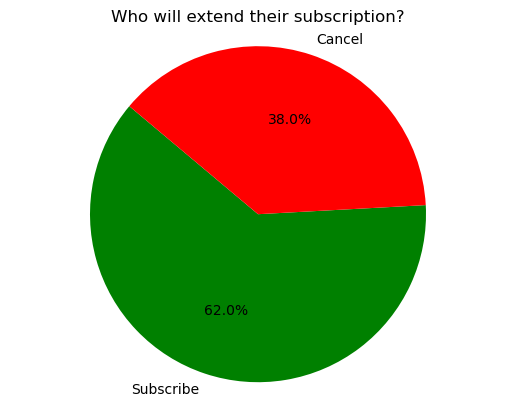

In [49]:
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # 원을 원형으로 유지
plt.title('Who will extend their subscription?')
plt.show()

# 분석 결론 도출

### 꾸준히 학습하는 사용자가 구독을 연장할까? 
꾸준히 학습하는 사용자의 기준을  
**최근 학습 성취도가 평균 이상이며, 월간 활동적인 학습 일수가 15일 이상인 사람**으로 정의내렸습니다.  
  
그래서 꾸준히 공부하는 사용자들 중  
다음 달에 구독을 계속하는 사용자와 구독을 취소하는 사용자를 나누어 비교해 보았습니다.
  
그 결과, 다음달에도 구독을 계속하는 사용자는 **62%** 였고,  
다음달에 구독을 계속하지 않는 사용자는 **38%** 로 
  
열심히 학습하는 사용자가 구독을 연장할 확률이 더 높다는 것을 확인할 수 있었습니다.
  
